# Download Data

https://www.kaggle.com/mikhailverghese/cigarette-reviews-by-smokers

In [ ]:
!gdown --id 1ySNp84n4er1_rAYdLMcchMg7eMChoZcZ

Downloading...
From: https://drive.google.com/uc?id=1ySNp84n4er1_rAYdLMcchMg7eMChoZcZ
To: /content/smokerdata.csv
100% 410k/410k [00:00<00:00, 6.47MB/s]


# Import Library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/smokerdata.csv')
df

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating
0,ghanta,Marlboro,Reds,Regular,2007-06-21,Medium,Tolerable,Fair,3
1,Karawasa,Marlboro,Reds,Regular,2007-06-23,Very Strong,Tolerable,Fair,4
2,Tintedace,Camel,Turkish Gold,Regular,2007-06-23,Medium,Very Poor,High,1
3,Karawasa,Camel,Turkish Gold,Regular,2007-06-23,Strong,Pleasant,Fair,4
4,Tintedace,Newport,Full Flavor,Regular,2007-06-23,Medium,Very Pleasant,Fair,5
...,...,...,...,...,...,...,...,...,...
5433,sahrah120s,Marlboro,Full Flavor,100s,2018-11-18,Medium,Pleasant,Fair,4
5434,sahrah120s,Marlboro,Black,100s,2018-11-18,Strong,Pleasant,High,4
5435,floras,Benson and Hedges,Gold,Regular,2019-01-24,Medium,Very Pleasant,Very High,5
5436,Monijonnlopez,Marlboro,Special Blend (Red),100s,2019-01-26,Medium,Very Pleasant,Very High,5


In [ ]:
User = df['User'].drop_duplicates()
len(User)

2953

In [ ]:
len(df['Brand'].drop_duplicates())

24

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      5438 non-null   object
 1   Brand     5438 non-null   object
 2   Variety   5438 non-null   object
 3   Type      5438 non-null   object
 4   Date      5438 non-null   object
 5   Strength  5438 non-null   object
 6   Taste     5438 non-null   object
 7   Price     5438 non-null   object
 8   Rating    5438 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 382.5+ KB


In [ ]:
df.describe()

,Rating
count,5438.000000
mean,3.929386
std,1.206847
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Preprocess Data

In [ ]:
df['Brand_variety'] = df[['Brand', 'Variety']].apply(lambda x: ' '.join(x), axis=1)
df

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating,Brand_variety
0,ghanta,Marlboro,Reds,Regular,2007-06-21,Medium,Tolerable,Fair,3,Marlboro Reds
1,Karawasa,Marlboro,Reds,Regular,2007-06-23,Very Strong,Tolerable,Fair,4,Marlboro Reds
2,Tintedace,Camel,Turkish Gold,Regular,2007-06-23,Medium,Very Poor,High,1,Camel Turkish Gold
3,Karawasa,Camel,Turkish Gold,Regular,2007-06-23,Strong,Pleasant,Fair,4,Camel Turkish Gold
4,Tintedace,Newport,Full Flavor,Regular,2007-06-23,Medium,Very Pleasant,Fair,5,Newport Full Flavor
...,...,...,...,...,...,...,...,...,...,...
5433,sahrah120s,Marlboro,Full Flavor,100s,2018-11-18,Medium,Pleasant,Fair,4,Marlboro Full Flavor
5434,sahrah120s,Marlboro,Black,100s,2018-11-18,Strong,Pleasant,High,4,Marlboro Black
5435,floras,Benson and Hedges,Gold,Regular,2019-01-24,Medium,Very Pleasant,Very High,5,Benson and Hedges Gold
5436,Monijonnlopez,Marlboro,Special Blend (Red),100s,2019-01-26,Medium,Very Pleasant,Very High,5,Marlboro Special Blend (Red)


In [ ]:
Brand = df['Brand_variety'].drop_duplicates()
len(Brand)

92

## Content Base filtering

In [ ]:
df[df['Brand_variety']=='Marlboro Reds'].head(10)

,User,Brand,Variety,Type,Date,Strength,Taste,Price,Rating,Brand_variety
0,ghanta,Marlboro,Reds,Regular,2007-06-21,Medium,Tolerable,Fair,3,Marlboro Reds
1,Karawasa,Marlboro,Reds,Regular,2007-06-23,Very Strong,Tolerable,Fair,4,Marlboro Reds
7,Grimey,Marlboro,Reds,Regular,2007-06-23,Very Strong,Poor,Fair,3,Marlboro Reds
30,Malboroman,Marlboro,Reds,Regular,2007-06-24,Strong,Pleasant,Low,4,Marlboro Reds
54,Cigarette Dromidary,Marlboro,Reds,Regular,2007-06-30,Strong,Pleasant,Low,5,Marlboro Reds
60,Eminent,Marlboro,Reds,Regular,2007-06-30,Very Strong,Poor,High,2,Marlboro Reds
62,Teen Smoker,Marlboro,Reds,Regular,2007-06-30,Very Strong,Tolerable,Low,4,Marlboro Reds
72,dyaz4ever,Marlboro,Reds,Regular,2007-07-02,Strong,Poor,Low,2,Marlboro Reds
75,CaliSunbug,Marlboro,Reds,Regular,2007-07-03,Very Strong,Very Poor,Fair,1,Marlboro Reds
88,Flava,Marlboro,Reds,Regular,2007-07-11,Very Strong,Tolerable,High,2,Marlboro Reds


In [ ]:
df_brand = df[['Brand_variety','Strength','Taste','Price']].copy()
df_brand_dup = df_brand['Brand_variety'].drop_duplicates().tolist()
list_brand = []
for i in range(len(df_brand_dup)):
  list_brand_ = (df_brand[df_brand['Brand_variety']==df_brand_dup[i]]['Strength'].mode()[0],
  df_brand[df_brand['Brand_variety']==df_brand_dup[i]]['Taste'].mode()[0],
  df_brand[df_brand['Brand_variety']==df_brand_dup[i]]['Price'].mode()[0])
  list_brand.append(list_brand_)
df_brand_clearn = pd.DataFrame(list_brand,columns=['Strength','Taste','Price'])
df_brand_clearn['Brand'] = df_brand_dup
df_brand_clearn

,Strength,Taste,Price,Brand
0,Strong,Pleasant,Fair,Marlboro Reds
1,Medium,Pleasant,Fair,Camel Turkish Gold
2,Strong,Very Pleasant,High,Newport Full Flavor
3,Medium,Very Pleasant,Fair,Marlboro Blend No. 27
4,Weak,Pleasant,Fair,Camel No. 9
...,...,...,...,...
87,Medium,Very Pleasant,Fair,Pall Mall Menthol Lights
88,Medium,Very Pleasant,Fair,marlboro special blend
89,Medium,Very Pleasant,Fair,Marlboro Southern Cut
90,Medium,Very Pleasant,Fair,Pall Mall Black Menthol


In [ ]:
dfnew = df[['User','Brand_variety','Rating','Strength','Taste','Price']].copy()
dfnew

,User,Brand_variety,Rating,Strength,Taste,Price
0,ghanta,Marlboro Reds,3,Medium,Tolerable,Fair
1,Karawasa,Marlboro Reds,4,Very Strong,Tolerable,Fair
2,Tintedace,Camel Turkish Gold,1,Medium,Very Poor,High
3,Karawasa,Camel Turkish Gold,4,Strong,Pleasant,Fair
4,Tintedace,Newport Full Flavor,5,Medium,Very Pleasant,Fair
...,...,...,...,...,...,...
5433,sahrah120s,Marlboro Full Flavor,4,Medium,Pleasant,Fair
5434,sahrah120s,Marlboro Black,4,Strong,Pleasant,High
5435,floras,Benson and Hedges Gold,5,Medium,Very Pleasant,Very High
5436,Monijonnlopez,Marlboro Special Blend (Red),5,Medium,Very Pleasant,Very High


In [ ]:
dfnew.iloc[0]

User                    ghanta
Brand_variety    Marlboro Reds
Rating                       3
Strength                Medium
Taste                Tolerable
Price                     Fair
Name: 0, dtype: object

In [ ]:
df_brand_clearn[df_brand_clearn['Brand']=='Marlboro Reds']

,Strength,Taste,Price,Brand
0,Strong,Pleasant,Fair,Marlboro Reds


In [ ]:
def content_data(x,y,z):
  df = df_brand_clearn[(df_brand_clearn['Strength']==x)&(df_brand_clearn['Taste']==y)&(df_brand_clearn['Price']==z)]
  return df

In [ ]:
print(len(content_data('Strong','Pleasant','Fair')))
content_data('Strong','Pleasant','Fair')

8


,Strength,Taste,Price,Brand
0,Strong,Pleasant,Fair,Marlboro Reds
8,Strong,Pleasant,Fair,Winston Full Flavor
18,Strong,Pleasant,Fair,Camel Wides Filters
39,Strong,Pleasant,Fair,Camel Menthol (Silver)
45,Strong,Pleasant,Fair,Pall Mall Full Flavor
48,Strong,Pleasant,Fair,Maverick Full Flavor
54,Strong,Pleasant,Fair,USA Gold Full Flavor
78,Strong,Pleasant,Fair,Newport Non-Menthol


## Collaborative filtering

### Create User X Rating matrix

In [ ]:
cmat = pd.crosstab(dfnew['User'],dfnew['Brand_variety'],dfnew['Rating'],aggfunc='mean')
cmat

Brand_variety,305's Full Flavor,American Spirit Full Flavor,American Spirit Lights,American Spirit Mediums,American Spirit Menthol,American Spirit Menthol Lights,American Spirit Organic,American Spirit Perique,American Spirit Ultra Lights,Basic Full Flavor,Benson and Hedges Full Flavor,Benson and Hedges Gold,Benson and Hedges Menthol,Camel Crush,Camel Crush (Bold),Camel Filters Full Flavor,Camel Full Flavor,Camel Lights,Camel Menthol (Cool Burst Green),Camel Menthol (Silver),Camel No. 9,Camel No. 9 Menthol,Camel Reds,Camel Signature Blend Frost,Camel Signature Blend Infused,Camel Turkish Gold,Camel Turkish Royal,Camel Turkish Silver,Camel Wides Filters,Djarum Black,Djarum Specials,Dunhill Full Flavor (Red),KOOL Menthol,KOOL Milds,KOOL XL Green,L&M Full Flavor,L&M Lights,L&M Menthol,Lucky Strike Classic,Lucky Strike Filters,...,Marlboro Menthol Lights,Marlboro Menthol Milds,Marlboro Reds,Marlboro Skyline Menthol,Marlboro Smooth Menthol,Marlboro Southern Cut,Marlboro Special Blend (Black),Marlboro Special Blend (Red),Marlboro Special Blend Gold Lights,Marlboro Special Blend Red,Marlboro Ultra Lights,Marlboro Virginia Blend,Maverick Full Flavor,Maverick Menthol (Silver),Misty Menthol,Nat Sherman Classic,Nat Sherman Hint of Mint,Newport Full Flavor,Newport Menthol,Newport Non-Menthol,Pall Mall Black Menthol,Pall Mall Full Flavor,Pall Mall Lights (Blue),Pall Mall Menthol,Pall Mall Menthol Lights,Pall Mall Reds,Pall Mall Straights,Pall Mall Ultra Lights (Orange),Parliament Full Flavor,Parliament Lights (White),Pyramid Full Flavor,Salem Green Label Full Flavor,Sonoma Full Flavor,USA Gold Full Flavor,Virginia Slims Full Flavor,Virginia Slims Luxury Lights,Virginia Slims Menthol,Winston Full Flavor,Winston Lights,marlboro special blend
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SavvLovesCamel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Eureka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1gramma,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$ixtiesFreak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00000,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoey05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
cmat = cmat.fillna(0)
cmat

Brand_variety,305's Full Flavor,American Spirit Full Flavor,American Spirit Lights,American Spirit Mediums,American Spirit Menthol,American Spirit Menthol Lights,American Spirit Organic,American Spirit Perique,American Spirit Ultra Lights,Basic Full Flavor,Benson and Hedges Full Flavor,Benson and Hedges Gold,Benson and Hedges Menthol,Camel Crush,Camel Crush (Bold),Camel Filters Full Flavor,Camel Full Flavor,Camel Lights,Camel Menthol (Cool Burst Green),Camel Menthol (Silver),Camel No. 9,Camel No. 9 Menthol,Camel Reds,Camel Signature Blend Frost,Camel Signature Blend Infused,Camel Turkish Gold,Camel Turkish Royal,Camel Turkish Silver,Camel Wides Filters,Djarum Black,Djarum Specials,Dunhill Full Flavor (Red),KOOL Menthol,KOOL Milds,KOOL XL Green,L&M Full Flavor,L&M Lights,L&M Menthol,Lucky Strike Classic,Lucky Strike Filters,...,Marlboro Menthol Lights,Marlboro Menthol Milds,Marlboro Reds,Marlboro Skyline Menthol,Marlboro Smooth Menthol,Marlboro Southern Cut,Marlboro Special Blend (Black),Marlboro Special Blend (Red),Marlboro Special Blend Gold Lights,Marlboro Special Blend Red,Marlboro Ultra Lights,Marlboro Virginia Blend,Maverick Full Flavor,Maverick Menthol (Silver),Misty Menthol,Nat Sherman Classic,Nat Sherman Hint of Mint,Newport Full Flavor,Newport Menthol,Newport Non-Menthol,Pall Mall Black Menthol,Pall Mall Full Flavor,Pall Mall Lights (Blue),Pall Mall Menthol,Pall Mall Menthol Lights,Pall Mall Reds,Pall Mall Straights,Pall Mall Ultra Lights (Orange),Parliament Full Flavor,Parliament Lights (White),Pyramid Full Flavor,Salem Green Label Full Flavor,Sonoma Full Flavor,USA Gold Full Flavor,Virginia Slims Full Flavor,Virginia Slims Luxury Lights,Virginia Slims Menthol,Winston Full Flavor,Winston Lights,marlboro special blend
User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SavvLovesCamel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Eureka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#1gramma,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$ixtiesFreak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoey05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
num_name_user = list(range(len(User)))
cmat.index = num_name_user
cmat

Brand_variety,305's Full Flavor,American Spirit Full Flavor,American Spirit Lights,American Spirit Mediums,American Spirit Menthol,American Spirit Menthol Lights,American Spirit Organic,American Spirit Perique,American Spirit Ultra Lights,Basic Full Flavor,Benson and Hedges Full Flavor,Benson and Hedges Gold,Benson and Hedges Menthol,Camel Crush,Camel Crush (Bold),Camel Filters Full Flavor,Camel Full Flavor,Camel Lights,Camel Menthol (Cool Burst Green),Camel Menthol (Silver),Camel No. 9,Camel No. 9 Menthol,Camel Reds,Camel Signature Blend Frost,Camel Signature Blend Infused,Camel Turkish Gold,Camel Turkish Royal,Camel Turkish Silver,Camel Wides Filters,Djarum Black,Djarum Specials,Dunhill Full Flavor (Red),KOOL Menthol,KOOL Milds,KOOL XL Green,L&M Full Flavor,L&M Lights,L&M Menthol,Lucky Strike Classic,Lucky Strike Filters,...,Marlboro Menthol Lights,Marlboro Menthol Milds,Marlboro Reds,Marlboro Skyline Menthol,Marlboro Smooth Menthol,Marlboro Southern Cut,Marlboro Special Blend (Black),Marlboro Special Blend (Red),Marlboro Special Blend Gold Lights,Marlboro Special Blend Red,Marlboro Ultra Lights,Marlboro Virginia Blend,Maverick Full Flavor,Maverick Menthol (Silver),Misty Menthol,Nat Sherman Classic,Nat Sherman Hint of Mint,Newport Full Flavor,Newport Menthol,Newport Non-Menthol,Pall Mall Black Menthol,Pall Mall Full Flavor,Pall Mall Lights (Blue),Pall Mall Menthol,Pall Mall Menthol Lights,Pall Mall Reds,Pall Mall Straights,Pall Mall Ultra Lights (Orange),Parliament Full Flavor,Parliament Lights (White),Pyramid Full Flavor,Salem Green Label Full Flavor,Sonoma Full Flavor,USA Gold Full Flavor,Virginia Slims Full Flavor,Virginia Slims Luxury Lights,Virginia Slims Menthol,Winston Full Flavor,Winston Lights,marlboro special blend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Decompose Matrix into two matrices using NMF

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=30)
nmf.fit(cmat)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=30)

In [ ]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=cmat.columns)
H

Brand_variety,305's Full Flavor,American Spirit Full Flavor,American Spirit Lights,American Spirit Mediums,American Spirit Menthol,American Spirit Menthol Lights,American Spirit Organic,American Spirit Perique,American Spirit Ultra Lights,Basic Full Flavor,Benson and Hedges Full Flavor,Benson and Hedges Gold,Benson and Hedges Menthol,Camel Crush,Camel Crush (Bold),Camel Filters Full Flavor,Camel Full Flavor,Camel Lights,Camel Menthol (Cool Burst Green),Camel Menthol (Silver),Camel No. 9,Camel No. 9 Menthol,Camel Reds,Camel Signature Blend Frost,Camel Signature Blend Infused,Camel Turkish Gold,Camel Turkish Royal,Camel Turkish Silver,Camel Wides Filters,Djarum Black,Djarum Specials,Dunhill Full Flavor (Red),KOOL Menthol,KOOL Milds,KOOL XL Green,L&M Full Flavor,L&M Lights,L&M Menthol,Lucky Strike Classic,Lucky Strike Filters,...,Marlboro Menthol Lights,Marlboro Menthol Milds,Marlboro Reds,Marlboro Skyline Menthol,Marlboro Smooth Menthol,Marlboro Southern Cut,Marlboro Special Blend (Black),Marlboro Special Blend (Red),Marlboro Special Blend Gold Lights,Marlboro Special Blend Red,Marlboro Ultra Lights,Marlboro Virginia Blend,Maverick Full Flavor,Maverick Menthol (Silver),Misty Menthol,Nat Sherman Classic,Nat Sherman Hint of Mint,Newport Full Flavor,Newport Menthol,Newport Non-Menthol,Pall Mall Black Menthol,Pall Mall Full Flavor,Pall Mall Lights (Blue),Pall Mall Menthol,Pall Mall Menthol Lights,Pall Mall Reds,Pall Mall Straights,Pall Mall Ultra Lights (Orange),Parliament Full Flavor,Parliament Lights (White),Pyramid Full Flavor,Salem Green Label Full Flavor,Sonoma Full Flavor,USA Gold Full Flavor,Virginia Slims Full Flavor,Virginia Slims Luxury Lights,Virginia Slims Menthol,Winston Full Flavor,Winston Lights,marlboro special blend
0,0.00,0.00,0.05,0.00,0.00,0.00,0.04,0.00,0.07,0.00,0.27,0.02,0.00,0.00,0.13,0.00,0.00,0.19,0.08,0.41,0.09,0.00,0.00,0.00,0.02,2.60,8.13,1.26,0.00,0.0,0.09,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,0.13,...,0.01,0.01,0.00,0.00,0.00,0.00,0.14,0.11,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.01,0.00,0.00,0.00,0.04,0.01,0.02,0.00,0.01,0.00,0.01,0.00,0.10,0.00,0.06,0.00,0.00,0.00,0.04,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.03,0.00,0.05,0.08,0.00,0.00,...,0.08,0.02,0.00,0.05,0.00,0.00,0.00,0.02,0.04,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,8.19,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.05,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.09,0.00,0.08,0.0
2,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.09,0.12,0.05,0.00,0.00,0.03,0.00,0.0,0.00,0.04,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.11,...,0.00,0.00,6.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.0
3,0.00,0.00,0.15,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.09,0.00,0.00,0.05,0.00,0.00,0.06,0.00,0.0,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,...,0.05,0.02,0.00,0.08,0.00,0.00,0.00,0.00,0.03,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.03,7.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.04,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.03,0.00,0.05,0.0
4,0.00,0.00,0.00,0.08,0.00,0.00,0.10,0.00,0.00,0.04,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.13,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.08,0.07,0.00,0.09,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.64,0.00,0.00,0.00,0.00,0.01,0.00,0.21,0.00,0.03,0.05,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.0
5,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.11,0.06,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.08,0.08,0.07,0.19,0.00,0.00,0.00,0.0,0.00,0.28,0.00,0.08,0.00,0.00,0.00,0.00,6.94,0.44,...,0.06,0.00,0.00,0.0

In [ ]:
W = pd.DataFrame(np.round(nmf.transform(cmat),2), columns=H.index)
W

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.00,0.00,0.00,0.00,0.00
1,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.01,0.00,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.01,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.02,0.00,0.00
2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17
3,0.0,0.0,0.0,0.00,0.00,0.0,0.02,0.00,0.01,0.00,0.00,0.0,0.0,0.00,0.03,0.00,0.03,0.00,0.04,0.02,0.00,0.02,0.03,0.00,0.00,0.00,0.05,0.02,0.00,0.01
4,0.0,0.0,0.0,0.54,0.01,0.0,0.01,0.01,0.02,0.00,0.00,0.0,0.0,0.28,0.00,0.02,0.00,0.03,0.01,0.02,0.00,0.05,0.05,0.00,0.00,0.00,0.14,0.00,0.01,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.47,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2949,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.47,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2950,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.59
2951,0.0,0.0,0.0,0.01,0.00,0.0,0.01,0.00,0.00,0.24,0.00,0.0,0.0,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.16,0.04,0.00,0.00,0.00


In [ ]:
cmat

Brand_variety,305's Full Flavor,American Spirit Full Flavor,American Spirit Lights,American Spirit Mediums,American Spirit Menthol,American Spirit Menthol Lights,American Spirit Organic,American Spirit Perique,American Spirit Ultra Lights,Basic Full Flavor,Benson and Hedges Full Flavor,Benson and Hedges Gold,Benson and Hedges Menthol,Camel Crush,Camel Crush (Bold),Camel Filters Full Flavor,Camel Full Flavor,Camel Lights,Camel Menthol (Cool Burst Green),Camel Menthol (Silver),Camel No. 9,Camel No. 9 Menthol,Camel Reds,Camel Signature Blend Frost,Camel Signature Blend Infused,Camel Turkish Gold,Camel Turkish Royal,Camel Turkish Silver,Camel Wides Filters,Djarum Black,Djarum Specials,Dunhill Full Flavor (Red),KOOL Menthol,KOOL Milds,KOOL XL Green,L&M Full Flavor,L&M Lights,L&M Menthol,Lucky Strike Classic,Lucky Strike Filters,...,Marlboro Menthol Lights,Marlboro Menthol Milds,Marlboro Reds,Marlboro Skyline Menthol,Marlboro Smooth Menthol,Marlboro Southern Cut,Marlboro Special Blend (Black),Marlboro Special Blend (Red),Marlboro Special Blend Gold Lights,Marlboro Special Blend Red,Marlboro Ultra Lights,Marlboro Virginia Blend,Maverick Full Flavor,Maverick Menthol (Silver),Misty Menthol,Nat Sherman Classic,Nat Sherman Hint of Mint,Newport Full Flavor,Newport Menthol,Newport Non-Menthol,Pall Mall Black Menthol,Pall Mall Full Flavor,Pall Mall Lights (Blue),Pall Mall Menthol,Pall Mall Menthol Lights,Pall Mall Reds,Pall Mall Straights,Pall Mall Ultra Lights (Orange),Parliament Full Flavor,Parliament Lights (White),Pyramid Full Flavor,Salem Green Label Full Flavor,Sonoma Full Flavor,USA Gold Full Flavor,Virginia Slims Full Flavor,Virginia Slims Luxury Lights,Virginia Slims Menthol,Winston Full Flavor,Winston Lights,marlboro special blend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=cmat.columns)
reconstructed.index = cmat.index
reconstructed

Brand_variety,305's Full Flavor,American Spirit Full Flavor,American Spirit Lights,American Spirit Mediums,American Spirit Menthol,American Spirit Menthol Lights,American Spirit Organic,American Spirit Perique,American Spirit Ultra Lights,Basic Full Flavor,Benson and Hedges Full Flavor,Benson and Hedges Gold,Benson and Hedges Menthol,Camel Crush,Camel Crush (Bold),Camel Filters Full Flavor,Camel Full Flavor,Camel Lights,Camel Menthol (Cool Burst Green),Camel Menthol (Silver),Camel No. 9,Camel No. 9 Menthol,Camel Reds,Camel Signature Blend Frost,Camel Signature Blend Infused,Camel Turkish Gold,Camel Turkish Royal,Camel Turkish Silver,Camel Wides Filters,Djarum Black,Djarum Specials,Dunhill Full Flavor (Red),KOOL Menthol,KOOL Milds,KOOL XL Green,L&M Full Flavor,L&M Lights,L&M Menthol,Lucky Strike Classic,Lucky Strike Filters,...,Marlboro Menthol Lights,Marlboro Menthol Milds,Marlboro Reds,Marlboro Skyline Menthol,Marlboro Smooth Menthol,Marlboro Southern Cut,Marlboro Special Blend (Black),Marlboro Special Blend (Red),Marlboro Special Blend Gold Lights,Marlboro Special Blend Red,Marlboro Ultra Lights,Marlboro Virginia Blend,Maverick Full Flavor,Maverick Menthol (Silver),Misty Menthol,Nat Sherman Classic,Nat Sherman Hint of Mint,Newport Full Flavor,Newport Menthol,Newport Non-Menthol,Pall Mall Black Menthol,Pall Mall Full Flavor,Pall Mall Lights (Blue),Pall Mall Menthol,Pall Mall Menthol Lights,Pall Mall Reds,Pall Mall Straights,Pall Mall Ultra Lights (Orange),Parliament Full Flavor,Parliament Lights (White),Pyramid Full Flavor,Salem Green Label Full Flavor,Sonoma Full Flavor,USA Gold Full Flavor,Virginia Slims Full Flavor,Virginia Slims Luxury Lights,Virginia Slims Menthol,Winston Full Flavor,Winston Lights,marlboro special blend
0,0.00,0.00,0.00,0.01,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.21,0.01,0.00,0.00,0.00,4.69,0.00,0.05,0.00,0.01,0.00,0.18,0.03,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.06,0.0,0.14,0.10,0.00,0.08,0.07,0.0,0.00,...,0.07,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.08,0.08,0.00,0.00,0.0,0.61,0.01,0.00,0.0,0.04,0.00,0.00,0.00,0.00,0.00,0.03,0.73,0.00,0.00,0.00,0.04,0.00,0.16,0.36,0.00,0.00,0.00,0.00,0.00,0.0
1,0.00,0.00,0.35,0.03,0.01,0.01,0.11,0.00,0.06,0.06,0.20,0.00,0.08,0.09,0.01,0.00,0.00,0.82,0.06,0.01,0.12,0.15,0.00,0.06,0.00,0.04,0.01,0.13,0.00,0.00,0.00,0.03,0.0,0.07,0.04,0.08,0.18,0.00,0.0,0.07,...,0.24,0.18,0.0,0.02,0.11,0.00,0.13,0.02,0.04,0.06,0.09,0.38,0.12,0.16,0.0,0.00,0.03,0.00,0.0,0.16,0.00,0.00,4.08,0.00,0.00,0.23,0.05,0.00,0.17,1.08,0.00,0.03,0.04,0.01,0.03,0.00,0.00,0.00,0.18,0.0
2,0.19,0.00,0.00,0.00,0.03,0.07,0.00,0.00,0.00,0.03,0.17,0.06,0.00,0.00,0.05,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.0,0.00,...,0.01,0.00,0.0,0.13,0.00,0.79,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.16,0.00,0.39,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.0
3,0.01,0.00,0.03,0.01,0.05,0.02,0.02,0.12,0.01,0.03,0.05,0.00,0.03,0.09,0.02,0.00,0.00,0.03,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.04,0.00,0.01,0.18,0.00,0.00,0.01,0.0,0.01,0.02,0.25,0.03,0.00,0.0,0.03,...,0.02,0.01,0.0,0.03,0.00,0.05,0.06,0.01,0.01,0.02,0.01,0.01,0.12,0.02,0.0,0.02,0.01,0.00,0.0,0.03,0.00,0.00,0.28,0.20,0.00,0.08,0.05,0.00,0.11,0.00,0.02,0.02,0.01,0.03,0.00,0.00,0.01,0.29,0.06,0.0
4,0.21,0.13,0.20,0.02,0.16,0.14,0.04,0.29,0.02,0.10,0.22,0.07,0.23,0.18,0.08,0.00,0.00,0.07,0.07,0.19,0.12,0.15,0.13,0.14,0.11,0.14,0.00,0.10,0.31,2.02,0.30,0.02,0.0,0.05,0.08,0.00,0.05,0.00,0.0,0.06,...,0.13,0.04,0.0,0.28,0.11,0.89,0.08,0.02,0.05,0.05,0.04,0.05,0.00,0.02,0.0,0.06,0.05,4.02,0.0,0.03,0.05,0.07,0.07,0.00,0.02,0.11,0.09,0.03,0.44,0.00,0.44,0.12,0.03,0.10,0.01,0.00,0.02,0.82,0.16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
import re

def recomendation(uid,topk=5):
  res = reconstructed.T[uid].sort_values(ascending=False)[0:topk]
  res = list(res[res>0].index)
  res = dfnew[dfnew['Brand_variety'].isin(res)]
  res = res.drop_duplicates(subset='Brand_variety')
  res = res[:topk]
  res = res[['Brand_variety','Strength','Taste','Price']]
  return res

In [ ]:
def recomendation_cmat(uid,topk=5):
  res = cmat.T[uid].sort_values(ascending=False)[0:topk]
  res = list(res[res>0].index)
  res = dfnew[dfnew['Brand_variety'].isin(res)]
  res = res.drop_duplicates(subset='Brand_variety')
  res = res[:topk]
  res = res[['Brand_variety','Strength','Taste','Price']]
  return res

In [ ]:
user = 1

In [ ]:
for i in Brand:
  if cmat.loc[user][i]>1:
    print(i,'\n',df_brand_clearn[df_brand_clearn['Brand']==i])

Camel Lights 
    Strength     Taste Price         Brand
10   Medium  Pleasant  Fair  Camel Lights
Pall Mall Lights (Blue) 
    Strength     Taste Price                    Brand
46   Medium  Pleasant  Fair  Pall Mall Lights (Blue)
L&M Lights 
    Strength     Taste Price       Brand
53   Medium  Pleasant  Fair  L&M Lights


In [ ]:
res = recomendation_cmat(user,topk=10)
res

,Brand_variety,Strength,Taste,Price
16,Camel Lights,Medium,Very Pleasant,Low
137,Pall Mall Lights (Blue),Weak,Tolerable,Fair
326,L&M Lights,Medium,Very Pleasant,Fair


In [ ]:
res = recomendation(user,topk=10)
res

,Brand_variety,Strength,Taste,Price
8,Parliament Lights (White),Medium,Tolerable,Fair
16,Camel Lights,Medium,Very Pleasant,Low
18,American Spirit Lights,Medium,Pleasant,High
20,Winston Lights,Weak,Poor,Fair
26,Marlboro Menthol Lights,Weak,Poor,Fair
46,Benson and Hedges Full Flavor,Very Strong,Poor,Very High
137,Pall Mall Lights (Blue),Weak,Tolerable,Fair
325,Marlboro Virginia Blend,Strong,Very Pleasant,High
326,L&M Lights,Medium,Very Pleasant,Fair
1865,Pall Mall Reds,Medium,Very Pleasant,Fair


In [ ]:
print(len(content_data('Medium','Pleasant','Fair')))
content_data('Medium','Pleasant','Fair')

22


,Strength,Taste,Price,Brand
1,Medium,Pleasant,Fair,Camel Turkish Gold
6,Medium,Pleasant,Fair,Marlboro Medium
10,Medium,Pleasant,Fair,Camel Lights
11,Medium,Pleasant,Fair,Marlboro Lights
13,Medium,Pleasant,Fair,Winston Lights
17,Medium,Pleasant,Fair,Marlboro Menthol Lights
26,Medium,Pleasant,Fair,Marlboro Menthol Milds
46,Medium,Pleasant,Fair,Pall Mall Lights (Blue)
47,Medium,Pleasant,Fair,KOOL Milds
53,Medium,Pleasant,Fair,L&M Lights


In [ ]:
from scipy.spatial.distance import cosine

my_feature = pd.DataFrame(np.zeros((1,len(Brand))), columns=Brand)
# display(my_feature)
my_feature['Camel Lights'] = 3
# display(my_feature)

similarity = []

for idx in range(len(reconstructed)):
  similarity.append(1 - cosine(my_feature, reconstructed.iloc[idx].values))
# print(similarity)
similarity = pd.Series(similarity).fillna(0).tolist()
# print(similarity)
close_to = np.argsort(similarity)[-1]
# print(np.argsort(similarity))
print(close_to)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


481


In [ ]:
print(close_to)
res = recomendation(close_to,topk=10)
res

481


,Brand_variety,Strength,Taste,Price
2,Camel Turkish Gold,Medium,Very Poor,High
8,Parliament Lights (White),Medium,Tolerable,Fair
16,Camel Lights,Medium,Very Pleasant,Low
27,Camel Wides Filters,Strong,Pleasant,Fair
32,Parliament Full Flavor,Medium,Tolerable,Fair
46,Benson and Hedges Full Flavor,Very Strong,Poor,Very High
158,Maverick Full Flavor,Medium,Very Poor,Fair
755,Pyramid Full Flavor,Medium,Poor,Fair
950,Virginia Slims Luxury Lights,Strong,Very Pleasant,Very High
3467,Marlboro Southern Cut,Medium,Tolerable,High


In [ ]:
df_brand_clearn[df_brand_clearn['Brand']=='Camel Lights']

,Strength,Taste,Price,Brand
10,Medium,Pleasant,Fair,Camel Lights


In [ ]:
content_data("Medium", "Pleasant", "Fair")

,Strength,Taste,Price,Brand
1,Medium,Pleasant,Fair,Camel Turkish Gold
6,Medium,Pleasant,Fair,Marlboro Medium
10,Medium,Pleasant,Fair,Camel Lights
11,Medium,Pleasant,Fair,Marlboro Lights
13,Medium,Pleasant,Fair,Winston Lights
17,Medium,Pleasant,Fair,Marlboro Menthol Lights
26,Medium,Pleasant,Fair,Marlboro Menthol Milds
46,Medium,Pleasant,Fair,Pall Mall Lights (Blue)
47,Medium,Pleasant,Fair,KOOL Milds
53,Medium,Pleasant,Fair,L&M Lights


# Movies Data

## Download Data

In [ ]:
!gdown --id 1woyznL9rtKIALYdfKulYyxtjetcST4HU
!gdown --id 1mCwvXi4P0LjNHi_H-B9QSXHXopKPrM7d
!gdown --id 1dk-CILCnNi7Q3YrJEcjmuxRHLxBmNdKF

!unzip movie_rating.zip
!unzip movie_meta.zip

Downloading...
From: https://drive.google.com/uc?id=1woyznL9rtKIALYdfKulYyxtjetcST4HU
To: /content/movie_rating.zip
100% 675k/675k [00:00<00:00, 44.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mCwvXi4P0LjNHi_H-B9QSXHXopKPrM7d
To: /content/movie_meta.zip
100% 12.8M/12.8M [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dk-CILCnNi7Q3YrJEcjmuxRHLxBmNdKF
To: /content/movie_link_small.csv
100% 183k/183k [00:00<00:00, 61.3MB/s]
Archive:  movie_rating.zip
  inflating: ratings_small.csv       
Archive:  movie_meta.zip
  inflating: movies_metadata.csv     


In [ ]:
moviemeta = pd.read_csv('movies_metadata.csv')
moviemeta.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
ratingdat = pd.read_csv('ratings_small.csv')
ratingdat

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
linkdat = pd.read_csv('movie_link_small.csv')
linkdat.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
moviedat = linkdat.join(moviemeta,on='tmdbId',how='left')
moviedat

,movieId,imdbId,tmdbId,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,114709,862.0,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
1,2,113497,8844.0,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,48677,tt0087065,en,Cloak & Dagger,11-year-old Davey's mother is dead and his fat...,9.73502,/8dmtQGw1IHbs8V93EWrfbwtLgi6.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1984-08-10,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You can cry 'wolf' once too often!,Cloak & Dagger,False,6.2,40.0
2,3,113228,15602.0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190,tt2700330,en,The Two Escobars,"Pablo Escobar was the richest, most powerful d...",0.758472,/ctmHQio07EMng7dtUvaG8ZLxawk.jpg,[],[],2010-06-22,0.0,100.0,[],Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.6,14.0
3,4,114885,31357.0,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",NaN,137310,tt0472576,en,Wild Hearts,"When Bob Hart, a widowed police detective tryi...",1.05851,/fLl99MgxsumFK9gTyzzkxDjMJJE.jpg,"[{'name': 'Larry Levinson Productions', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-07-08,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wild Hearts,False,5.0,4.0
4,5,113041,11862.0,False,"{'id': 325798, 'name': 'Star Crash Collection'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,22049,tt0079946,en,Starcrash,A pair of smugglers manage to pick up a castaw...,1.98658,/hOx1RiBsqNWaKnFelJ9wWk7fAJa.jpg,"[{'name': 'New World Pictures', 'id': 1950}, {...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",1978-12-21,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A galactic adventure beyond your wildest dreams!,Starcrash,False,4.3,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,162672,3859980,402672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,163056,4262980,315011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9122,163949,2531318,391698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9123,164977,27660,137608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create User X Rating matrix

In [ ]:
ratingdat.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
cmat = pd.crosstab(ratingdat['userId'],ratingdat['movieId'],ratingdat['rating'],aggfunc=sum)
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cmat = cmat.fillna(0)
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Decompose Matrix into two matrices using NMF

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(100)
nmf.fit(cmat)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF(n_components=100)

In [ ]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
H = pd.DataFrame(np.round(nmf.components_,2), columns=cmat.columns)
H

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,2.47,1.96,0.00,0.00,6.20,2.89,0.33,0.0,0.00,0.86,7.89,0.00,0.0,0.00,0.00,4.65,1.70,0.0,0.00,0.00,2.98,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.17,4.39,3.82,0.0,3.47,0.0,0.0,9.02,0.00,0.00,...,0.0,0.12,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,1.97,0.00,0.32,0.00,0.69,1.09,1.52,0.0,0.00,0.00,1.19,0.36,0.0,0.00,0.00,0.00,1.91,0.0,0.32,0.00,1.52,0.0,0.0,0.00,0.13,0.0,0.0,0.22,0.00,0.00,0.00,0.98,1.85,0.0,0.06,0.0,0.0,2.01,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.70,0.43,0.00,0.00,0.00,0.21,0.00,0.0,0.00,2.50,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.37,0.00,0.78,0.0,0.0,0.02,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.24,1.42,0.0,0.00,0.0,0.0,0.61,0.05,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,1.01,0.00,0.00,0.00,0.15,0.00,0.0,0.00,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.04,0.02,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.21,0.00,0.00,2.09,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.35,0.00,0.00,0.00,0.00,0.25,0.20,0.0,0.00,0.00,0.30,0.00,0.0,0.36,0.00,0.41,0.51,0.0,0.00,0.00,0.41,0.0,0.0,0.00,0.46,0.0,0.0,0.00,0.00,0.00,0.00,0.41,0.41,0.0,0.41,0.0,0.0,0.30,0.00,0.00,...,0.0,0.00,0.41,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.41,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.56,0.03,0.01,0.0,0.00,0.01,0.00,0.00,0.0,0.01,0.00,0.05,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.58,0.0,0.00,0.0,0.0,0.00,0.01,0.02,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
96,0.00,0.00,0.00,0.00,0.00,0.25,0.32,0.0,0.00,0.31,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.01,0.0,0.0,0.00,0.02,0.0,0.0,0.01,0.00,0.44,0.03,0.31,0.00,0.0,0.00,0.0,0.0,0.00,0.01,0.02,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
97,0.00,0.00,0.00,0.00,0.00,0.40,0.12,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.02,0.0,0.00,0.00,0.04,0.0,0.0,0.00,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.03,0.00,0.0,0.08,0.0,0.0,0.00,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
98,0.05,0.00,0.30,0.18,0.20,0.00,0.02,0.0,0.03,0.00,0.30,0.04,0.0,0.00,0.00,0.00,0.00,0.0,0.04,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.45,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
W = pd.DataFrame(np.round(nmf.transform(cmat),2), columns=H.index)
W

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.03,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.05,0.0,0.0,0.00,0.00,0.01,0.00,0.08,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00
1,0.00,0.0,0.58,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.02,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.90,0.00,0.06,0.00,0.00,0.00,1.02,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00
2,0.01,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.00,0.00,0.0,0.03,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.00,0.20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.02,0.0,0.00,0.0,0.06,0.00,0.0,0.00,0.12,0.0,0.0,0.00,0.04,0.00,0.16,0.00,0.16,0.00,0.00,0.00,0.0,0.00,0.01,0.00,0.00,0.00,0.06,0.00,0.00,0.0,0.0,0.70,0.0,0.00,0.0,0.14,0.00,0.00
3,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,8.05,0.0,0.00,0.00,0.00
4,0.09,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.47,0.0,0.03,0.0,0.36,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.01,0.00,0.74,0.00,0.00,0.00,0.00,0.24,0.0,0.00,0.00,0.07,0.17,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.23,0.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.00,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.07,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.01,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.08,0.0,0.00,0.00,0.0,0.0,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.47,0.00,0.00,0.00,0.00,0.00,0.53,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00
667,0.00,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.02,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.09,0.0,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.99,0.0,0.00,0.0,0.00,0.00,0.12
668,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.14,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.0,0.00,0.61,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.02,0.0,0.00,0.29,0.0,0.0,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.02,0.00
669,0.01,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.09,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.00,0.00,0.0,0.0,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.17,0.00,0.00,0.00,0.00,0.02,0.25,0.04,0.00,0.0,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.74,0.0,0.00,0.0,0.00,0.00,0.00


In [ ]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=cmat.columns)
reconstructed.index = cmat.index
reconstructed

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.03,0.03,0.00,0.00,0.00,0.07,0.02,0.00,0.02,0.02,0.07,0.00,0.00,0.01,0.00,0.04,0.03,0.00,0.03,0.00,0.06,0.00,0.00,0.02,0.06,0.00,0.00,0.03,0.02,0.00,0.01,0.07,0.08,0.01,0.08,0.0,0.00,0.05,0.00,0.01,...,0.0,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.0
2,1.04,1.56,0.33,0.15,0.44,0.94,0.38,0.12,0.21,2.08,1.49,0.10,0.12,0.23,0.15,0.62,1.27,0.39,1.16,0.23,1.44,0.94,0.52,0.15,1.06,0.17,0.29,0.41,0.63,0.43,0.93,1.68,2.07,0.52,1.00,0.0,0.01,1.90,0.07,0.37,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
3,0.79,0.30,0.04,0.02,0.08,0.22,0.05,0.02,0.04,0.52,0.16,0.01,0.00,0.00,0.02,0.26,0.07,0.01,0.20,0.00,0.19,0.02,0.00,0.16,0.09,0.00,0.02,0.01,0.05,0.00,0.01,0.56,0.43,0.01,0.22,0.0,0.00,0.38,0.02,0.00,...,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,4.51,0.24,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.08,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.67,0.00,0.00,0.0,0.00,0.00,0.08,0.16,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
5,1.42,1.10,0.29,0.07,1.02,0.35,0.10,0.00,0.01,0.66,0.89,0.02,0.06,0.00,0.00,0.87,0.20,0.02,0.39,0.00,0.28,0.00,0.00,0.04,0.33,0.00,0.02,0.01,0.07,0.00,0.04,0.63,0.90,0.00,0.48,0.0,0.00,1.54,0.02,0.01,...,0.0,0.04,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1.58,0.84,0.40,0.12,0.38,1.19,0.45,0.07,0.22,1.05,0.96,0.11,0.07,0.53,0.09,1.03,1.78,0.69,0.59,0.13,1.49,0.64,0.27,0.14,1.88,0.30,0.16,0.68,1.11,0.71,0.53,2.31,1.90,0.85,1.94,0.0,0.01,1.24,0.09,0.77,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
668,0.28,0.05,0.04,0.01,0.02,0.16,0.03,0.00,0.02,0.13,0.01,0.01,0.02,0.04,0.00,0.14,0.15,0.04,0.02,0.00,0.09,0.05,0.00,0.06,0.20,0.02,0.00,0.05,0.07,0.07,0.00,0.48,0.24,0.04,0.33,0.0,0.00,0.05,0.01,0.04,...,0.0,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
669,0.41,0.00,0.04,0.00,0.03,0.21,0.03,0.00,0.11,0.00,0.26,0.02,0.00,0.02,0.05,0.33,0.10,0.02,0.17,0.00,0.03,0.00,0.00,0.30,0.05,0.01,0.06,0.01,0.06,0.01,0.01,0.18,0.13,0.01,0.10,0.0,0.00,0.20,0.02,0.02,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.01,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0


In [ ]:
cmat

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create Application

In [ ]:
import re

def recomendation(uid,topk=5):
  res = list(reconstructed.T[uid].sort_values(ascending=False)[0:topk].index)
  res = moviedat[moviedat['movieId'].isin(res)]
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]
  mList = ratingdat[ratingdat['userId']==uid][['movieId','rating']]
  #return mList, res
  res = res.merge(mList,on='movieId',how='left')
  #return res
  res = res[['movieId','title','genre','rating']]
  return res

In [ ]:
res = recomendation(10,topk=10)
res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
1,318,Nell,"[Drama, Thriller]",4.0
2,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
3,1036,Bhaji on the Beach,"[Comedy, Drama]",3.0
4,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
5,1198,White Squall,"[Action, Drama]",4.0
6,1210,Lethal Weapon 2,"[Action, Adventure, Comedy, Crime, Thriller]",4.0
7,1270,Muppet Treasure Island,"[Action, Comedy, Music, Family, Adventure]",NaN
8,1291,The Journey of August King,[Drama],4.0
9,2571,Hellraiser: Bloodline,"[Horror, Thriller, Science Fiction]",5.0


In [ ]:
res1 = list(reconstructed.T[10].sort_values(ascending=False)[0:5].index)
res1 = moviedat[moviedat['movieId'].isin(res1)]
res1 = res1.iloc[0]
res1genre = res1['genres']
re.findall(r"name': '(.*?)'}", res1genre)

['Comedy', 'Horror']

In [ ]:
res['genre'].iloc[0]

['Comedy', 'Horror']

In [ ]:
recomendation(10,topk=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,50,Jack & Sarah,"[Comedy, Drama, Romance]",5.0
1,110,The Tie That Binds,[Thriller],NaN
2,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
3,296,The Substitute,"[Action, Thriller]",NaN
4,318,Nell,"[Drama, Thriller]",4.0
5,356,Nixon,"[History, Drama]",NaN
6,480,Vanya on 42nd Street,"[Drama, Romance]",NaN
7,527,Cabin Boy,[Comedy],NaN
8,541,The Juror,"[Drama, Thriller]",NaN
9,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN


In [ ]:
## comedy horror type
userid = 398
topk = 20
recomendation(userid,topk)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
1,541,The Juror,"[Drama, Thriller]",NaN
2,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
3,1036,Bhaji on the Beach,"[Comedy, Drama]",NaN
4,1136,The Fan,"[Drama, Mystery, Thriller]",4.0
5,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",4.0
6,1197,Get Real,"[Drama, Romance]",5.0
7,1198,White Squall,"[Action, Drama]",4.0
8,1200,Under The Domim Tree,"[Drama, Foreign]",NaN
9,1210,Lethal Weapon 2,"[Action, Adventure, Comedy, Crime, Thriller]",NaN


In [ ]:
from scipy.spatial.distance import cosine
my_feature = np.zeros(len(reconstructed.iloc[0]))
my_feature[100] = 5
similarity = []
for idx in range(len(reconstructed)):
  similarity.append(1 - cosine(my_feature, reconstructed.iloc[idx].values))
similarity = pd.Series(similarity).fillna(0).tolist()
close_to = np.argsort(similarity)[-1]

## comedy romance drama type
userid = close_to
recomendation(userid,topk)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genre,rating
0,110,The Tie That Binds,[Thriller],NaN
1,260,Dracula: Dead and Loving It,"[Comedy, Horror]",NaN
2,318,Nell,"[Drama, Thriller]",NaN
3,356,Nixon,"[History, Drama]",NaN
4,480,Vanya on 42nd Street,"[Drama, Romance]",NaN
5,589,New York Cop,"[Action, Thriller, Crime, Drama]",NaN
6,1036,Bhaji on the Beach,"[Comedy, Drama]",NaN
7,1196,Lethal Weapon,"[Adventure, Action, Comedy, Thriller, Crime]",NaN
8,1197,Get Real,"[Drama, Romance]",1.0
9,1198,White Squall,"[Action, Drama]",NaN


In [ ]:
def recomendation(uid,topk=5):
  res = list(reconstructed.T[uid].sort_values(ascending=False)[0:topk].index)
  res = moviedat[moviedat['movieId'].isin(res)].dropna()
  # return res
  res['genre'] = [re.findall(r"name': '(.*?)'}", res) for res in res['genres']]
  mList = ratingdat[ratingdat['userId']==uid][['movieId','rating']]
  #return mList, res
  res = res.merge(mList,on='movieId',how='left')
  #return res
  res = res[['movieId','title','genre','rating']]
  return res

## Clustering

In [ ]:
from sklearn.cluster import KMeans
X = reconstructed
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
cluster = kmeans.predict(X)
X['cluster'] = cluster
X['userId'] = X.index
ofeat = X.iloc[:,0:-2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(ofeat)
pfeat = pca.transform(ofeat)

In [ ]:
ndat = pd.DataFrame(data=pfeat,columns=['pca1','pca2','pca3'])
ndat['cluster'] = X['cluster'].values
ndat

,pca1,pca2,pca3,cluster
0,-12.872973,2.487405,2.933046,0
1,-6.413917,5.131907,-8.828169,0
2,-6.704389,-0.978321,0.906884,0
3,15.782993,8.777174,-9.873874,2
4,0.813110,-2.653850,-2.616198,2
...,...,...,...,...
666,-6.660817,5.442568,-4.673467,0
667,-10.292979,1.545181,3.430707,0
668,-9.745647,1.625516,1.969476,0
669,-7.728973,2.218431,0.782169,0


In [ ]:
import matplotlib.pyplot as plt

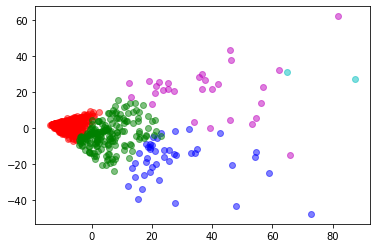

In [ ]:
clist = ['r','b','g','c','m','k']
for i in list(range(0,5)):
  sdat = ndat[ndat['cluster']==i][['pca1','pca2']].values
  plt.scatter(x=sdat[:,0], y=sdat[:,1], c=clist[i], alpha=0.5)
